<a href="https://colab.research.google.com/github/joynaomi81/Sentiment-Analysis-Based-Mental-Health-Prediction-with-Deep-Learning/blob/main/Sentiment_Analysis_Based_Mental_Health_Prediction_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps**
1. Data Collection
2. Import necessary libraries.
3. Load dataset
4. Data review
5. Data cleaning
6. Data visualization
7. Statistical analysis
8. Text pre-processing
9. Split data into training and test sets
10. Model Building/Model training
11. Model evaluation


## **1. Data Collection**

The dataset used in this project was sourced from Kaggle: [link text](https://https://www.kaggle.com/datasets/sujaykapadnis/mental-health-insights-data)

This dataset contains labeled text samples reflecting various sentiment categories, including Neutral, Positive, Negative, and Very Negative. It provides insights into mental health through sentiment analysis, making it suitable for training a deep learning model to predict sentiment from text.

## **2. Import necessary libraries.**

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
%matplotlib inline
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **3. Load dataset**

In [134]:
df = pd.read_csv('/content/drive/MyDrive/Mental Health Dataset.csv')

## **4. Data review**



In [135]:
df.head() # Check for the first 5 rows

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [136]:
df.tail() # Check for the last 5 rows

,posts,predicted,intensity
10387,hey everyone I am a 25 year old male I work ou...,negative,-1
10388,have surgery for stage 1 colon cancer 1 year a...,very negative,-2
10389,the doctor advise we he could not remove the a...,neutral,0
10390,my 66 year old father have been through so muc...,neutral,0
10391,I have bein have a bloody stool since last yea...,negative,-1


In [137]:
df.shape # Check for the shape of the dataset

(10392, 3)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


In [139]:
df['predicted'].value_counts()

,count
predicted,
neutral,4375
negative,4112
very negative,1155
positive,750


## **5. Data cleaning**

In [140]:
# Check for missing values using isnull()
df.isnull().sum()

,0
posts,1
predicted,0
intensity,0


In [141]:
# Drop rows with missing values
df.dropna(inplace=True)

In [142]:
df.isna().sum()

,0
posts,0
predicted,0
intensity,0


In [143]:
# Checking for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [144]:
# Drop duplicates rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [145]:
# Check for the new data shape
df.shape

(10391, 3)

In [146]:
df.drop('intensity', axis=1, inplace=True)


In [147]:
df.columns

Index(['posts', 'predicted'], dtype='object')

## **6.  Data Visualization**

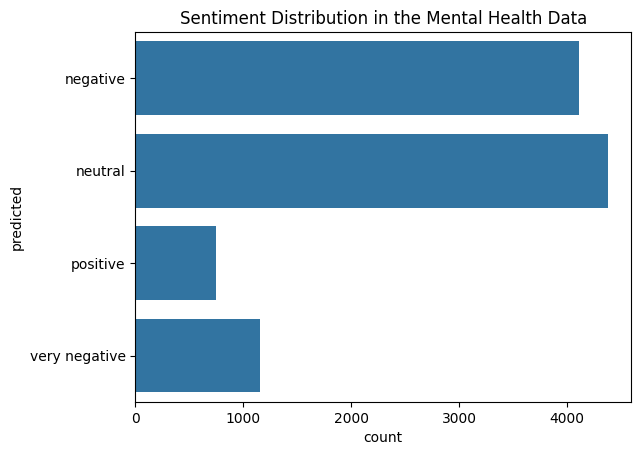

In [148]:
sns.countplot(df['predicted'])
plt.title('Sentiment Distribution in the Mental Health Data')
plt.show()

###Overview:
This bar chart represents the distribution of predicted sentiments in a mental health sentiment analysis project.

The x-axis shows the count of occurrences for each sentiment.

The y-axis lists of predicted sentiment categories related to mental health.

###Observations:
Neutral and Negative sentiments have the highest count, each appearing over 4,000 times.

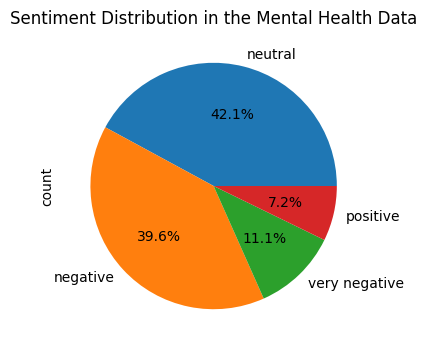

In [149]:
df['predicted'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 4))

plt.title('Sentiment Distribution in the Mental Health Data')
plt.show()


In [150]:
df.rename(columns={'predicted': 'sentiment'}, inplace=True)

In [151]:
df.rename(columns={'posts': 'text'}, inplace=True)

In [152]:
df.head()

,text,sentiment
0,I know as parent of child with down syndrome t...,negative
1,but in my heart I know this is the future prom...,neutral
2,I have mylefibrosis which turn to leukemia the...,negative
3,from one of my health group subject wayne dyer...,neutral
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral


## **7. Statistical analysis**

In [153]:
# Calculate frequency counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
neutral          4374
negative         4112
very negative    1155
positive          750
Name: count, dtype: int64


In [154]:
# The descriptive statistics
print(df['sentiment'].describe())


count       10391
unique          4
top       neutral
freq         4374
Name: sentiment, dtype: object


## **8. Text pre-processing**

In [155]:
df['text'] = df['text'].str.lower() # Convert data into lowercase
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) # Remove special characters
def remove_punctuations(text):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for x in text:
    if x in punctuations:
      text = text.replace(x, "")
  return text
df['text'] = df['text'].apply(remove_punctuations) # Remove punctuations
df.head()

,text,sentiment
0,i know as parent of child with down syndrome t...,negative
1,but in my heart i know this is the future prom...,neutral
2,i have mylefibrosis which turn to leukemia the...,negative
3,from one of my health group subject wayne dyer...,neutral
4,gmos now link to leukemia http nsnbc i ...,neutral


In [156]:
words = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in words])

df['text'] = df['text'].apply(lambda a: remove_stopwords(a))
df.head()

,text,sentiment
0,know parent child syndrome hear child high ris...,negative
1,heart know future promise article regardless h...,neutral
2,mylefibrosis turn leukemia want stem cell tran...,negative
3,one health group subject wayne dyer leukemia c...,neutral
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral


In [157]:
def remove_urls(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text) # remove urls

df['text'] = df['text'].apply(lambda a: remove_urls(a))

In [158]:
def remove_html_tags(text):
  return re.sub(r'<.*?>', '', text)

df['text'] = df['text'].apply(lambda a: remove_html_tags(a))
df.head()

,text,sentiment
0,know parent child syndrome hear child high ris...,negative
1,heart know future promise article regardless h...,neutral
2,mylefibrosis turn leukemia want stem cell tran...,negative
3,one health group subject wayne dyer leukemia c...,neutral
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral


In [159]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])  # Convert text labels to numbers
num_classes = len(encoder.classes_)
labels = to_categorical(df['sentiment'], num_classes=num_classes)  # Convert to one-hot encoding


In [160]:
from tensorflow.keras.utils import pad_sequences # Import pad_sequences from tensorflow.keras.utils instead
# Tokenization & Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding="post")

Splitting the data features and target variables.

* x = Features which is the 'text' column.
* y = Labels which is the 'sentiment' column.

In [161]:
x = df['text']
y = df['sentiment']

## **9. Split the data into training and test sets**

In [162]:
from sklearn.model_selection import train_test_split # Import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y,
                                                    test_size=0.2, random_state=42, stratify=y)


## **10. Model Building/Model training**

In [163]:
# Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [164]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
# Train Model
history = model.fit(X_train, to_categorical(y_train, num_classes=num_classes), epochs=10, batch_size=32, validation_data=(X_test, to_categorical(y_test, num_classes=num_classes)))

Epoch 1/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.9938 - loss: 0.0166 - val_accuracy: 0.6902 - val_loss: 2.2157
Epoch 2/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.6888 - val_loss: 1.9458
Epoch 3/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.9928 - loss: 0.0204 - val_accuracy: 0.6975 - val_loss: 2.2349
Epoch 4/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9957 - loss: 0.0178 - val_accuracy: 0.6825 - val_loss: 1.9289
Epoch 5/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9946 - loss: 0.0191 - val_accuracy: 0.6888 - val_loss: 2.4746
Epoch 6/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.9948 - loss: 0.0211 - val_accuracy: 0.6902 - val_loss: 2.1354
Epoch 7/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9945 - loss: 0.0169 - val_accuracy: 0.6888 - val_loss: 2.3267
Epoch 8/10
260/260 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.9957 - loss: 0.0142 - 

## **11. Model Evaluation**

In [188]:
from sklearn.metrics import classification_report # Import the classification_report function from scikit-learn.metrics

y_test_onehot = to_categorical(y_test, num_classes=num_classes)

# predicted class indices
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# true class indices
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       823
           1       0.76      0.79      0.78       875
           2       0.38      0.41      0.39       150
           3       0.67      0.56      0.61       231

    accuracy                           0.69      2079
   macro avg       0.62      0.61      0.61      2079
weighted avg       0.69      0.69      0.69      2079



In [192]:
training_accuracy = history.history['accuracy']
accuracy = np.mean(training_accuracy)

print(f"\nTraining Accuracy: {accuracy:.4f}")


Training Accuracy: 0.9947


In [180]:
#print the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"\nModel Test Accuracy: {accuracy:.4f}")


Model Test Accuracy: 0.7042
